In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from preprocess_data import preprocess_survey_data as clean

In [2]:
df, colmap, encmap = clean("../data/cookie_survey_responses.csv")
print(colmap)

{'Question 1': 'How old are you? (Please enter a number in years)', 'Question 2': 'What are you currently studying or what is your area of expertise? If none, you may leave this blank.', 'Question 3': 'What web browser do you use most frequently?', 'Question 4': 'How familiar are you with how website cookies work?', 'Question 5': 'Do you understand what a cookie does and what data you give away when you accept cookies?', 'Question 6': "Do you feel like you understand what you're agreeing to when you accept cookies on a website?", 'Question 7': 'Which types of cookies are you familiar with (Select all that apply)', 'Question 8': 'Do you care that third-parties may be collecting some of your data through cookies?', 'Question 9': 'Would you be more likely to customize your cookie settings if websites explained their purpose in simpler terms?', 'Question 10': 'Are you able to block all third-party cookies on your main browser?', 'Question 11': 'When you visit a website and see a cookie con

## Respondent Demographics

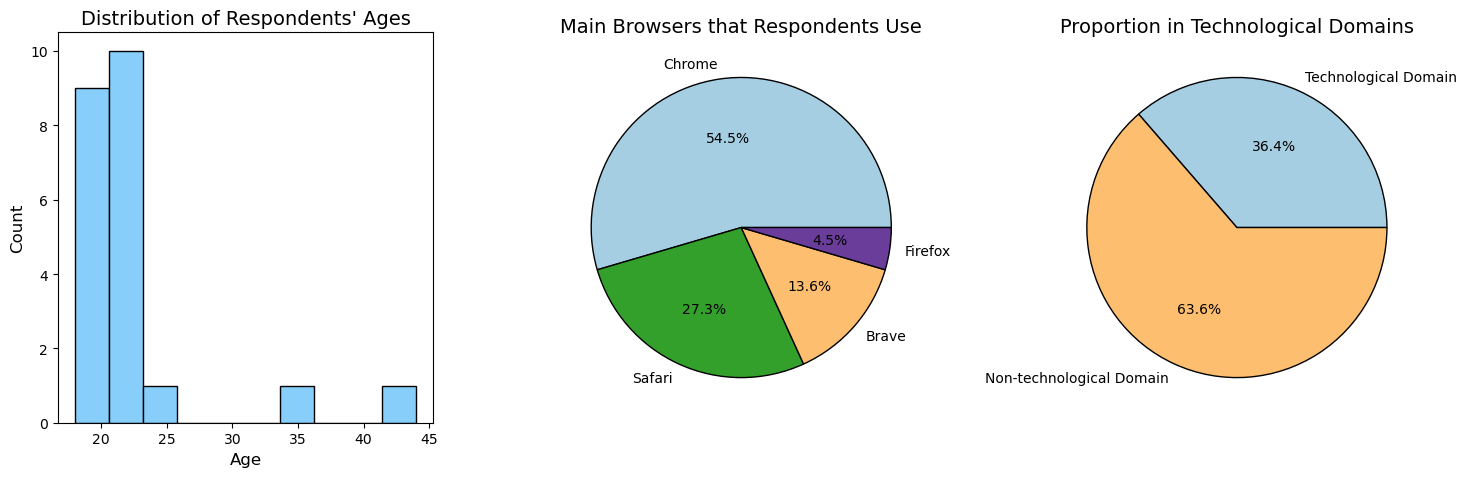

In [7]:
# 1x3 grid of plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set universal font size
plt.rcParams.update({'font.size': 14})

# ages histogram
axes[0].hist(df["Question 1"], color="lightskyblue", edgecolor='black')
axes[0].set_title("Distribution of Respondents' Ages", fontsize=14)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# browsers pie chart
counts = df['Question 3'].value_counts()
labels = counts.index
sizes = counts.values
colors = [plt.cm.Paired(i / len(sizes)) for i in range(len(sizes))]
axes[1].pie(sizes, labels=labels, colors=colors, textprops={'fontsize': 10},
            autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Main Browsers that Respondents Use", fontsize=14)

# technological domain pie chart
colors = [plt.cm.Paired(i / 2) for i in range(2)]
axes[2].pie([8/22, 14/22], labels=["Technological Domain", "Non-technological Domain"],
            colors=colors, textprops={'fontsize': 10}, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
axes[2].set_title("Proportion in Technological Domains", fontsize=14)

plt.tight_layout()
plt.savefig("charts/demographics.png", dpi=300)
plt.show()

## Insights by Respondent Browser

How easy is it to reject cookies in each browser?

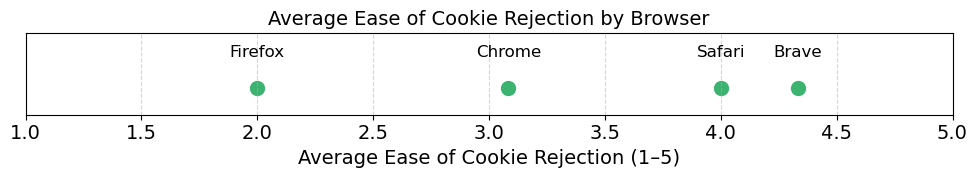

In [55]:
browser_ease = df.groupby("Question 3")["Question 13"].mean().sort_values()

# Plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.scatter(browser_ease.values, [1]*len(browser_ease), color="mediumseagreen", s=100)

# Add labels next to each dot
for i, (browser, val) in enumerate(browser_ease.items()):
    ax.text(val, 1.05, browser, ha='center', va='bottom', fontsize=12)

# Styling
ax.set_yticks([])
ax.set_xlabel("Average Ease of Cookie Rejection (1–5)")
ax.set_title("Average Ease of Cookie Rejection by Browser", fontsize=14)
ax.set_xlim(1, 5)
ax.set_ylim(0.95, 1.1)
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("charts/browser_ease_of_reject.png", dpi=300)
plt.show()

Do people know how to stop sharing cookies with a website in their browser?

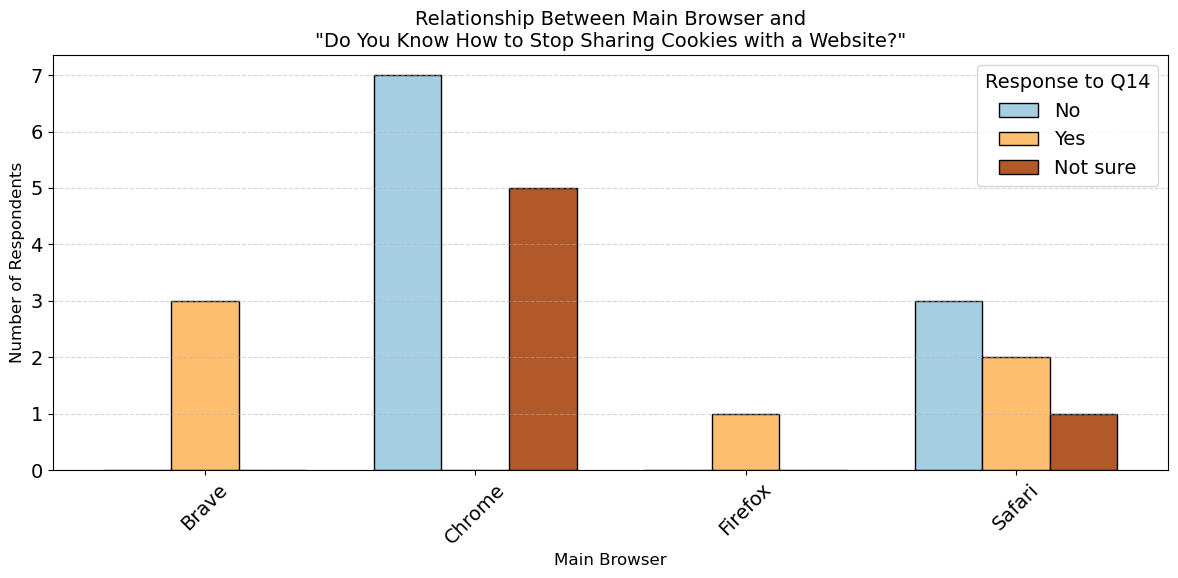

In [68]:
counts = df.groupby(['Question 3', 'Question 14']).size().unstack(fill_value=0)

# Sort browser order (optional)
counts = counts.sort_index()

# Setup
labels = counts.index.tolist()  # Browsers
response_types = ["No", "Yes", "Not sure"]
x = np.arange(len(labels))  # browser positions
width = 0.25  # width of each bar
colors = plt.cm.Paired(np.linspace(0, 1, len(response_types)))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, response in enumerate(response_types):
    ax.bar(x + i * width - width, counts[response], width, label=response, color=colors[i], edgecolor="black")

# Formatting
ax.set_xlabel("Main Browser", fontsize=12)
ax.set_ylabel("Number of Respondents", fontsize=12)
ax.set_title('Relationship Between Main Browser and\n"Do You Know How to Stop Sharing Cookies with a Website?"', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title="Response to Q14")
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("charts/browser_change_cookie_settings.png", dpi=300)
plt.show()

Relationship between main browser and "Are you able to block all third-party cookies by default on your browser?"

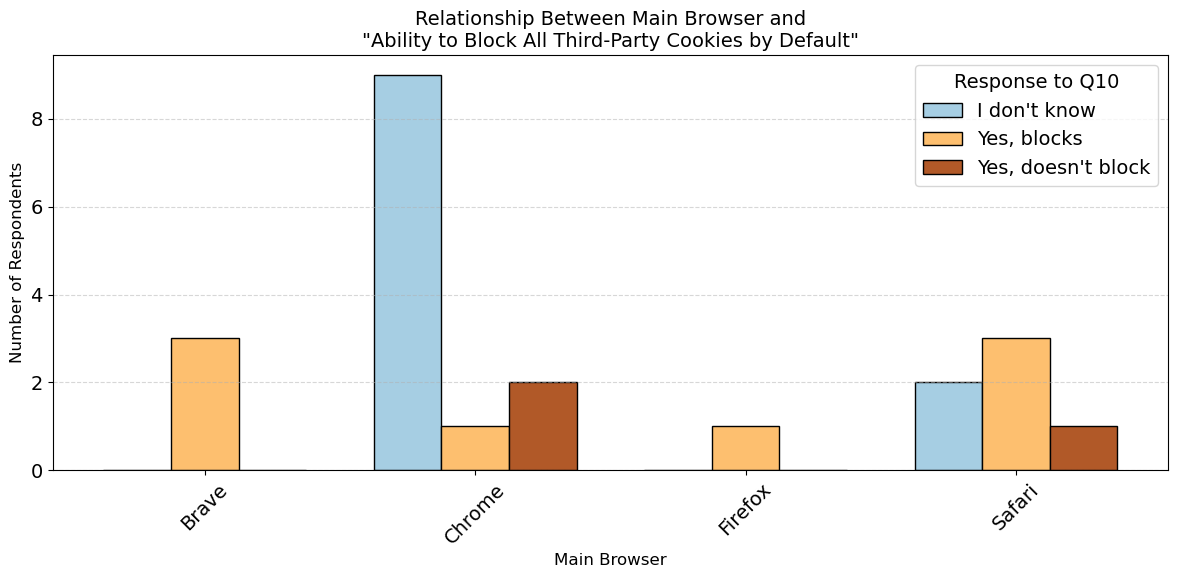

In [101]:
q10_map = {
    0: "I don't know",
    1: "Yes, blocks",
    2: "Yes, doesn't block"
}
df['Q10_decoded'] = df['Question 10'].map(q10_map)

# Create grouped counts
counts = df.groupby(['Question 3', 'Q10_decoded']).size().unstack(fill_value=0)
counts = counts.sort_index()

# Setup
labels = counts.index.tolist()  # Browsers
response_types = ["I don't know", "Yes, blocks", "Yes, doesn't block"]
x = np.arange(len(labels))  # browser positions
width = 0.25
colors = plt.cm.Paired(np.linspace(0, 1, len(response_types)))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, response in enumerate(response_types):
    ax.bar(
        x + i * width - width,
        counts[response],
        width,
        label=response,
        color=colors[i],
        edgecolor="black"
    )

# Formatting
ax.set_xlabel("Main Browser", fontsize=12)
ax.set_ylabel("Number of Respondents", fontsize=12)
ax.set_title('Relationship Between Main Browser and\n"Ability to Block All Third-Party Cookies by Default"', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title="Response to Q10")
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("charts/broswer_block_third_party.png", dpi=300)
plt.show()

## General College Student Behavior

Do college students understand what cookies are?

In [5]:
encmap["Question 5"]

{0: 'I understand the basics',
 1: 'No, not at all',
 2: 'Not really',
 3: 'Yes, fully'}

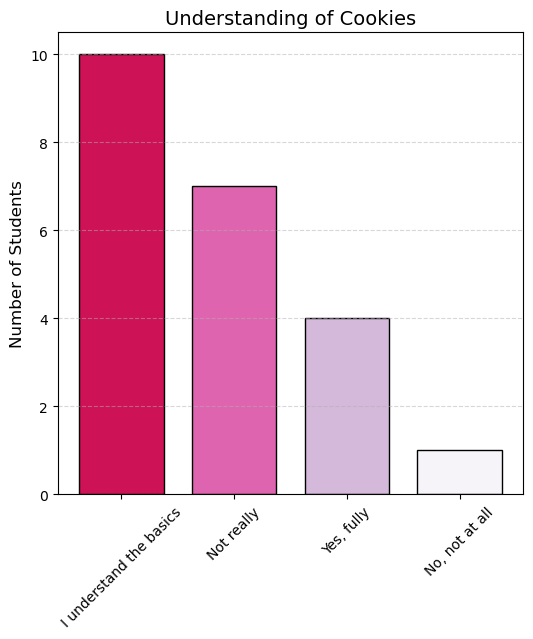

In [15]:
df["Q5_decoded"] = df["Question 5"].map(encmap["Question 5"])

counts = df['Q5_decoded'].value_counts()
labels = counts.index
sizes = counts.values
colors = [plt.cm.PuRd(i / len(labels)) for i in range(len(labels))]
colors = [colors[len(colors) - i - 1] for i in range(len(colors))]

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(
    x=labels,
    height=sizes,
    width=.75,
    color=colors,
    edgecolor="black"
)

plt.xticks(rotation=45)
ax.set_title("Understanding of Cookies", fontsize=14)
ax.set_ylabel("Number of Students", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("charts/cookie_understanding.png", dpi=300, bbox_inches = "tight")
plt.show()

Do college students care about the data that cookies may collect?

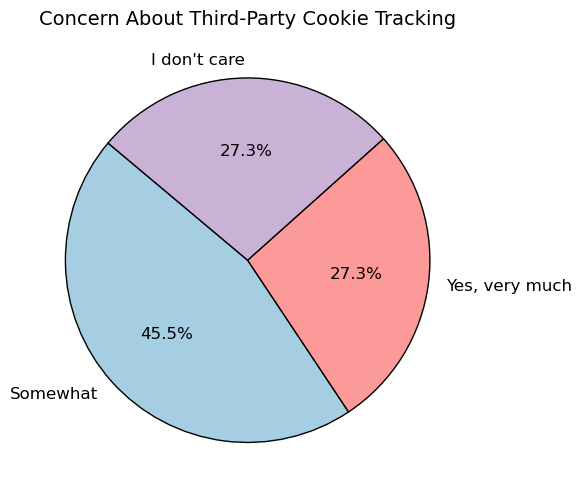

In [77]:
df['Q8_decoded'] = df['Question 8'].map(encmap["Question 8"])

# Count the responses
counts = df['Q8_decoded'].value_counts()
labels = counts.index
sizes = counts.values
colors = [plt.cm.Paired(i / len(labels)) for i in range(len(labels))]

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title("Concern About Third-Party Cookie Tracking", fontsize=14)

plt.tight_layout()
plt.savefig("charts/third_party_concern.png", dpi=300)
plt.show()

What do college students generally do when presented with a cookie banner? (Accept, reject, etc)

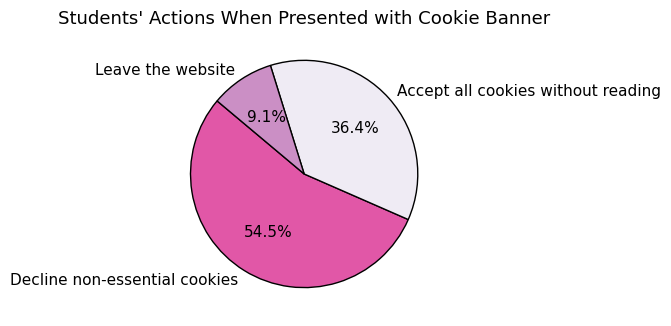

In [20]:
df['Q11_decoded'] = df['Question 11'].map(encmap["Question 11"])

# Count the responses
counts = df['Q11_decoded'].value_counts()
labels = counts.index
sizes = counts.values

# Shuffle Paired colormap
colors = [plt.cm.PuRd(i / 100) for i in random.sample([j for j in range(100)], k=3)]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title("Students' Actions When Presented with Cookie Banner", fontsize=13)

plt.tight_layout()
plt.savefig("charts/action_at_cookie_prompt.png", dpi=300, bbox_inches="tight")
plt.show()

Do people actually know what they're giving away with cookies and understand cookie banner language? <br/> 
Decided to just make this a bolded figure in the text rather than a chart.

In [98]:
encmap["Question 20"]

{0: "I don't know", 1: 'Website Login Sessions'}

In [8]:
sum(df["Question 20"])/len(df)

0.4090909090909091

# Other Exploration

In [ ]:
#set style
sns.set_theme(style="whitegrid", context="paper", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

#load dataset
df = pd.read_csv('data.csv')

#basic info
print("DataFrame shape:", df.shape)
print("Column types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())

#identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

#1. Histogram of numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins= 30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

#2. Boxplots: for mean comparison (t-tests)
"""adjust"""
for cat_col in categorical_cols:
    unique_vals = df[cat_col].nunique()
    if 2 <= unique_vals<= 6: #to avoid too many categories
        for num_col in numeric_cols:
            plt.figure()
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f'Boxplot of {num_col} by {cat_col}')
            plt.xticks(rotation=45, ha='right')
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
       
#3. Count plots: for proportion comparison (z-tests)
for cat_col in categorical_cols:
    plt.figure()
    sns.countplot(x=cat_col, data=df)
    plt.title(f'Count plot of {cat_col}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Group', loc='upper right')
    plt.tight_layout()
    plt.show()

#4. Correlation heatmap (numerical only)
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

#5. Pairplot
if 2 <= len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols].dropna(), plot_kws={'alpha':0.6, 's':30})
    plt.title('Pairplot of Numerical Columns')
    plt.show()

print("All visualizations saved as PNGs.")